# Lead Scoring Case Study

# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## 1. Reading and Understanding Data

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# shape of the dataset
df.shape

(9240, 37)

In [4]:
# basics of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Checking Important Parameters
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 2. Checking The Missing Value

In [6]:
# Converting all the values to lower case
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [7]:
# Replacing 'Select' with NaN (Since it means no option is selected)
df = df.replace('select',np.nan)

In [8]:
# Checking the percentage of missing values
null_percen = df.isnull().sum()/len(df)*100
null_percen.sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

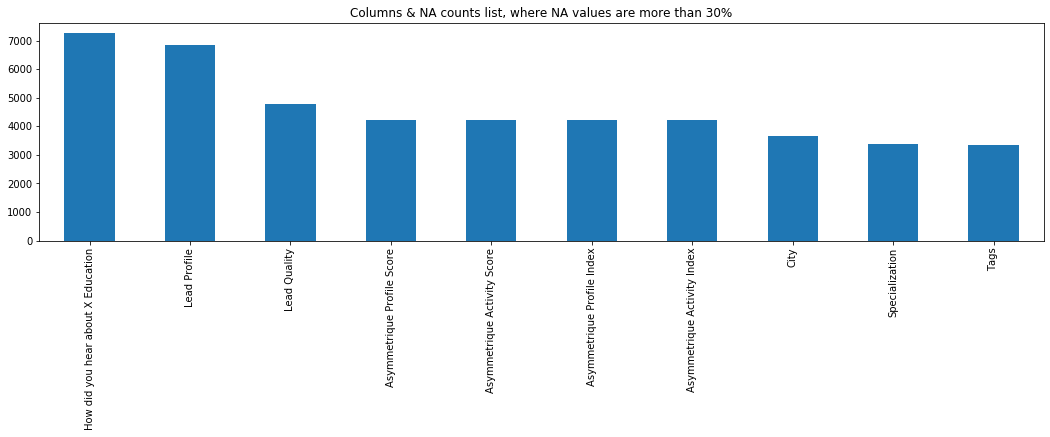

In [9]:
# Checking Columns & NA counts list, where NA values are more than 30%
NA_Col = df.isnull().sum().sort_values(ascending = False)
NA_Col = NA_Col[NA_Col.values > (0.30*len(df))]
plt.figure(figsize=(18,4))
NA_Col.plot(kind='bar')
plt.title('Columns & NA counts list, where NA values are more than 30%')
plt.show()

### Data Cleaning

In [10]:
# Removing all the columns that are no required and have 30% null values
df1 = df.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
df1.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,no,no,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,no,no,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,no,no,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,no,no,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,no,no,no,no,no,no,no,no,no,modified


In [11]:
# Number of columns left after dropping null values
df1.shape

(9240, 27)

In [12]:
# null values left
null_percen = df1.isnull().sum()/len(df1)*100
null_percen.sort_values(ascending = False)

Specialization                                   36.580087
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Lead Origin                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
Total Time Spent on Website                       0.000000
Last Notable Activity                             0.000000
A free copy of Mastering The Interview            0.000000
Search                                            0.000000
Magazine                                          0.0000

In [13]:
# Checking if there are columns with one unique value since it won't affect our analysis
df1.nunique()

Prospect ID                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [14]:
# Dropping unique valued columns
df2= df1.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [15]:
df2.shape

(9240, 22)

In [16]:
# Imputing values inplace of Null
df2['Specialization'] = df2['Specialization'].fillna('not provided') 
df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('not provided')
df2['Country'] = df2['Country'].fillna('not provided')
df2['What is your current occupation'] = df2['What is your current occupation'].fillna('not provided')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [17]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [18]:
# countrywise distribution of leads
df2["Country"].value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
nigeria                    4
kuwait                     4
germany                    4
canada                     4
south africa               4
sweden                     3
belgium                    2
ghana                      2
asia/pacific region        2
italy                      2
bangladesh                 2
uganda                     2
china                      2
netherlands                2
philippines                2
vietnam                    1
sri lanka                  1
russia                     1
denmark                    1
switzerland                1
liberia       

In [19]:
# segmenting leads into India and outside India
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df2['Country'] = df2.apply(lambda x:slots(x['Country']), axis = 1)
df2['Country'].value_counts()

india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [20]:
# dropping "Prospect ID"
df3 = df2.drop('Prospect ID',1)
df3.shape

(9240, 21)

In [21]:
df4 = df3[df3.isnull().sum(axis=1) <1]

In [22]:
# Code for checking number of rows left in percent
round(100*(df4.shape[0])/(df.shape[0]),2)

98.2

In [23]:
# Rechecking the percentage of missing values
round(100*(df4.isnull().sum()/len(df4.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

- There is not null Value present

In [24]:
# Columns before and after dropping
print("Columns dropped\t: ",len(df))    
print("Old data rows,columns",df.shape,"\nNew data rows,columns",df4.shape)

Columns dropped	:  9240
Old data rows,columns (9240, 37) 
New data rows,columns (9074, 21)


We have dropped 16 columns and left with only 21 columns. These columns cantain less than 30% null values.

## 3. EDA

In [25]:
# cheaking dataframe
df4.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,not provided,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


### 3.1. Univariate Analysis

#### Categorical Variables

Text(0.5, 1.0, 'Lead Origin')

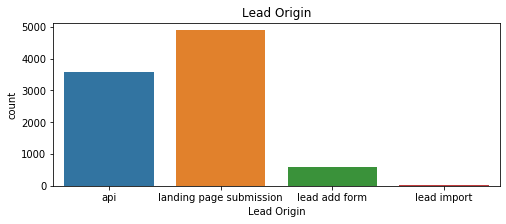

In [26]:
# Visualizing Lead Origin
plt.figure(figsize=(8,3))
sns.countplot(df4['Lead Origin'])
plt.title('Lead Origin')

Text(0.5, 1.0, 'Lead Source')

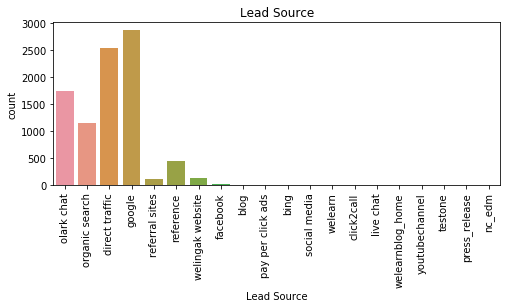

In [27]:
# Visualizing Lead Source
plt.figure(figsize=(8,3))
sns.countplot(df4['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

Text(0.5, 1.0, 'Do Not Email')

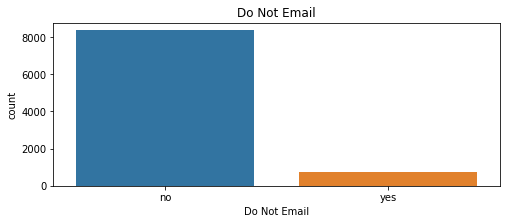

In [28]:
# Visualizing DO Not Email
plt.figure(figsize=(8,3))
sns.countplot(df4['Do Not Email'])
plt.title('Do Not Email')

Text(0.5, 1.0, 'Do Not Call')

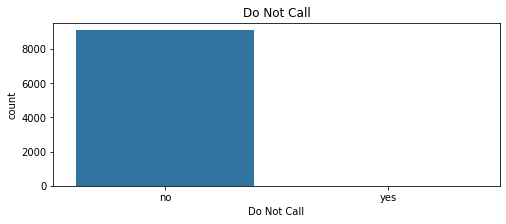

In [29]:
# Visualizing Do Not Call
plt.figure(figsize=(8,3))
sns.countplot(df4['Do Not Call'])
plt.title('Do Not Call')

Text(0.5, 1.0, 'Converted')

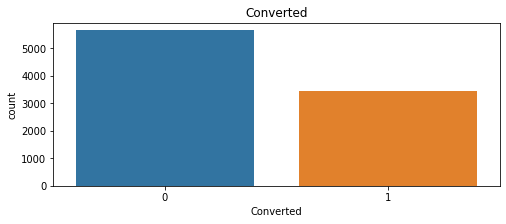

In [30]:
# Visualizing Converted
plt.figure(figsize=(8,3))
sns.countplot(df4['Converted'])
plt.title('Converted')

Text(0.5, 1.0, 'Last Activity')

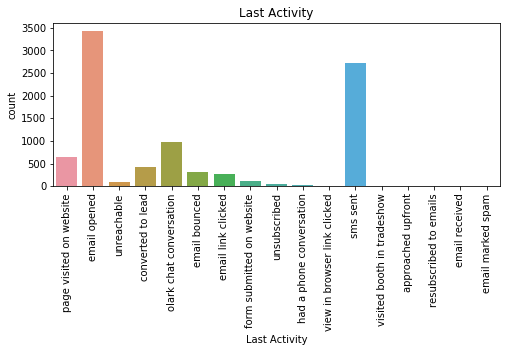

In [31]:
# Visualizing Last Activity
plt.figure(figsize=(8,3))
sns.countplot(df4['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

Text(0.5, 1.0, 'Country')

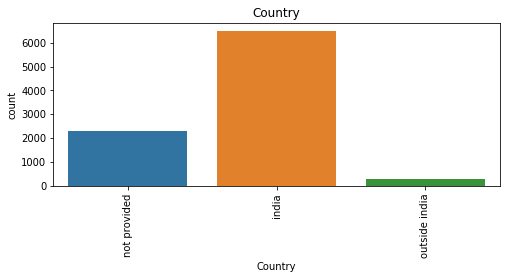

In [32]:
# Visualizing Country
plt.figure(figsize=(8,3))
sns.countplot(df4['Country']).tick_params(axis='x', rotation = 90)
plt.title('Country')

Text(0.5, 1.0, 'Specialization')

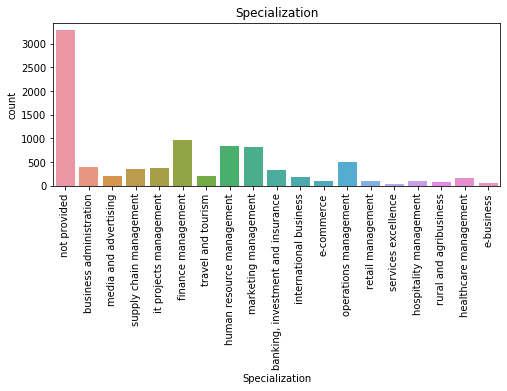

In [33]:
# Visualizing Specialization
plt.figure(figsize=(8,3))
sns.countplot(df4['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

Text(0.5, 1.0, 'What is your current occupation')

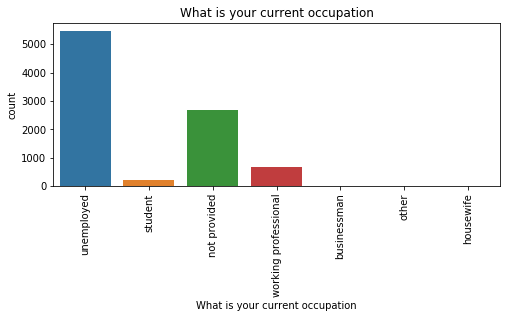

In [34]:
# Visualizing What is your current occupation
plt.figure(figsize=(8,3))
sns.countplot(df4['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

Text(0.5, 1.0, 'What matters most to you in choosing a course')

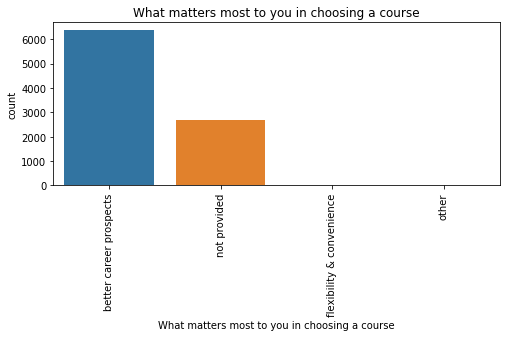

In [35]:
# Visualizing What matters most to you in choosing a course
plt.figure(figsize=(8,3))
sns.countplot(df4['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

Text(0.5, 1.0, 'Search')

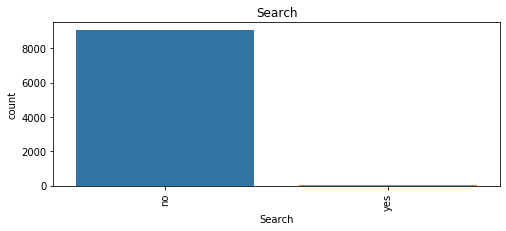

In [36]:
# Visualizing Search
plt.figure(figsize=(8,3))
sns.countplot(df4['Search']).tick_params(axis='x', rotation = 90)
plt.title('Search')

Text(0.5, 1.0, 'Newspaper Article')

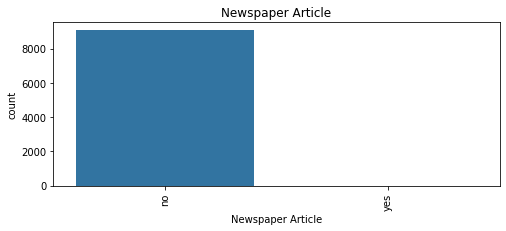

In [37]:
# Visualizing Newspaper Article
plt.figure(figsize=(8,3))
sns.countplot(df4['Newspaper Article']).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

Text(0.5, 1.0, 'X Education Forums')

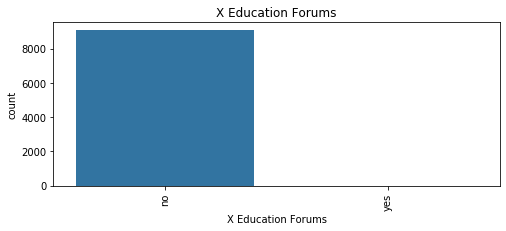

In [38]:
# Visualizing X Education Forums
plt.figure(figsize=(8,3))
sns.countplot(df4['X Education Forums']).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')

Text(0.5, 1.0, 'Newspaper')

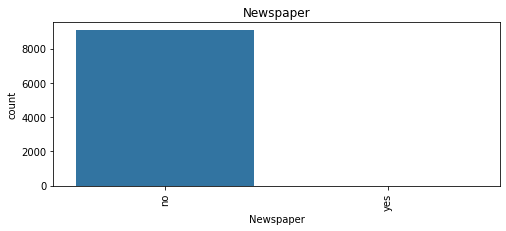

In [39]:
# Visualizing Newspaper
plt.figure(figsize=(8,3))
sns.countplot(df4['Newspaper']).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

Text(0.5, 1.0, 'Digital Advertisement')

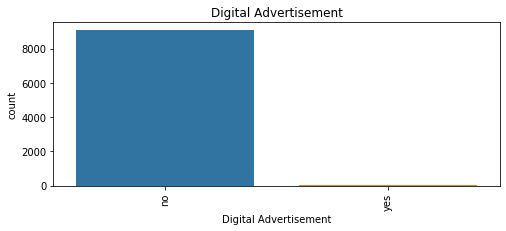

In [40]:
# Visualizing Digital Advertisement
plt.figure(figsize=(8,3))
sns.countplot(df4['Digital Advertisement']).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')

Text(0.5, 1.0, 'Through Recommendations')

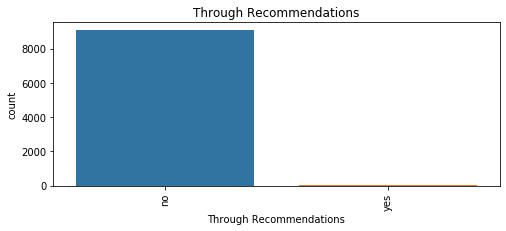

In [41]:
# Visualizing Through Recommendation
plt.figure(figsize=(8,3))
sns.countplot(df4['Through Recommendations']).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

Text(0.5, 1.0, 'A free copy of Mastering The Interview')

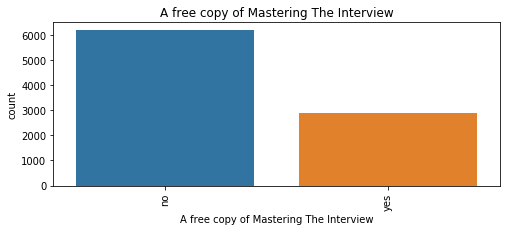

In [42]:
# Visualizing A free copy of Mastering The Interview
plt.figure(figsize=(8,3))
sns.countplot(df4['A free copy of Mastering The Interview']).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')

Text(0.5, 1.0, 'Last Notable Activity')

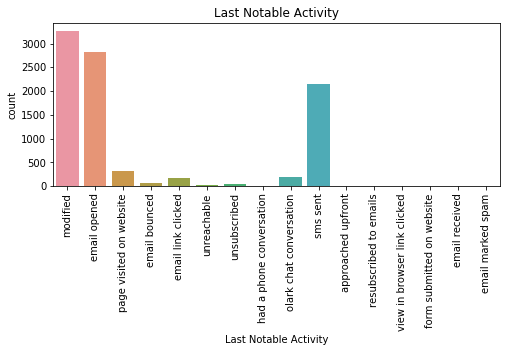

In [43]:
# Visualizing Last Notable Activity
plt.figure(figsize=(8,3))
sns.countplot(df4['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

#### Removing Features with 95% Constant Value

In [44]:
# droping
df5 = df4.drop(['Through Recommendations','Digital Advertisement','Newspaper','X Education Forums','Do Not Call','Search','Newspaper Article','What matters most to you in choosing a course', 'Country'],axis=1)

In [45]:
# rechecking columns after dropping
df5.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Numerical Variables

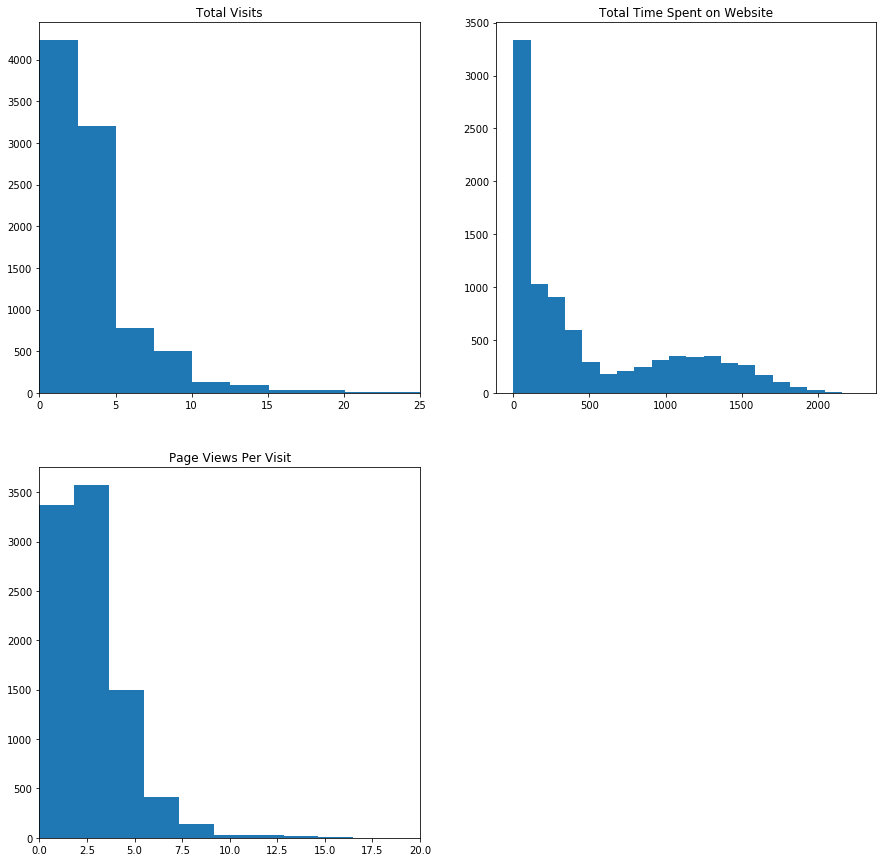

In [46]:
# Lets check the Numerical Variables
plt.figure(figsize = (15,15))
plt.subplot(221)
plt.hist(df5['TotalVisits'], bins = 100)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df5['Total Time Spent on Website'], bins = 20)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df5['Page Views Per Visit'], bins = 30)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### 3.2. Relating all the categorical variables to Converted (Bivariate Analysis)

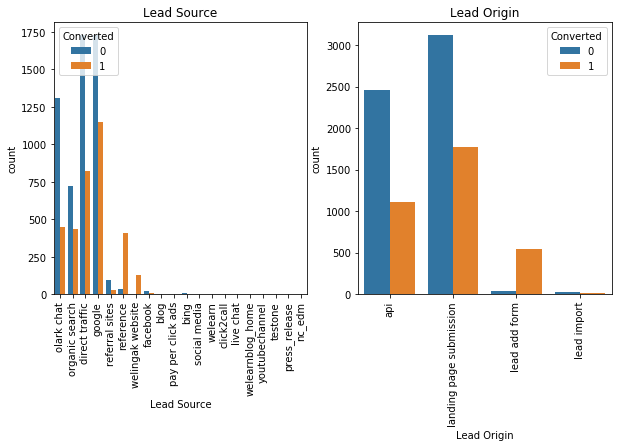

In [47]:
# Relating all the lead search and Lead Origin variables to Converted
plt.figure(figsize = (10,5))

plt.subplot(1,2,2)
sns.countplot(x='Lead Origin', hue='Converted', data= df5).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,1)
sns.countplot(x='Lead Source', hue='Converted', data= df5).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()


Text(0.5, 1.0, 'Last Activity')

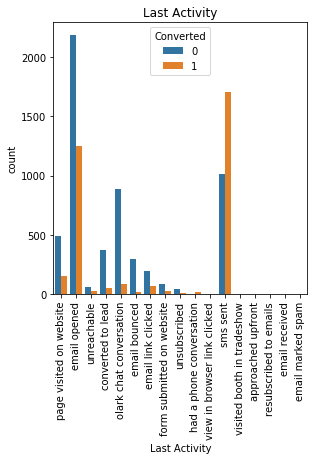

In [48]:
# Relating all the Last activity variable to Converted
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= df5).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')



Text(0.5, 1.0, 'Do Not Email')

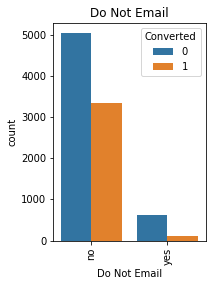

In [49]:
# Relating all the Do Not Email variable to Converted
plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df5).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

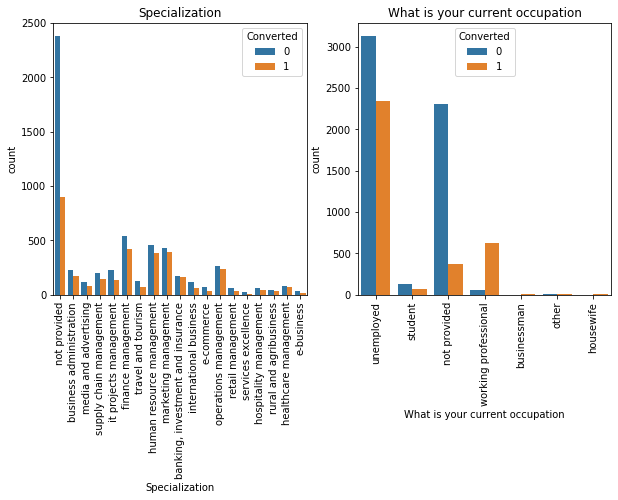

In [50]:
# Relating all the specialization and What is your current occupation variables to Converted
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df5).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df5).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

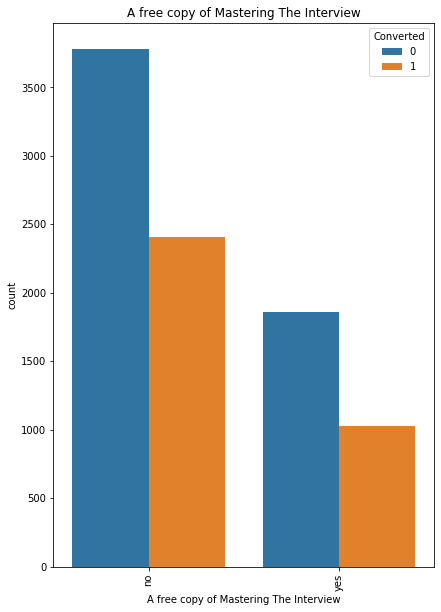

In [51]:
# Relating all the A free copy of Mastering the interview variable to Converted
plt.figure(figsize = (15,10))

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df5).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

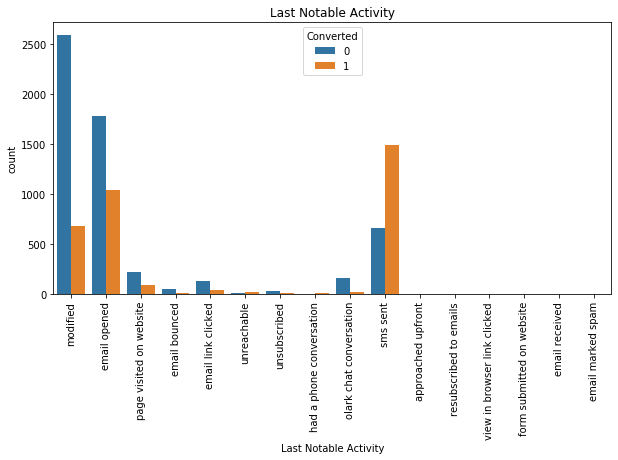

In [52]:
# Relating all the Last Notable Activity to Converted
plt.figure(figsize = (10,5))

sns.countplot(x='Last Notable Activity', hue='Converted', data= df5).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()


### 3.3. Multi-variate Analysis

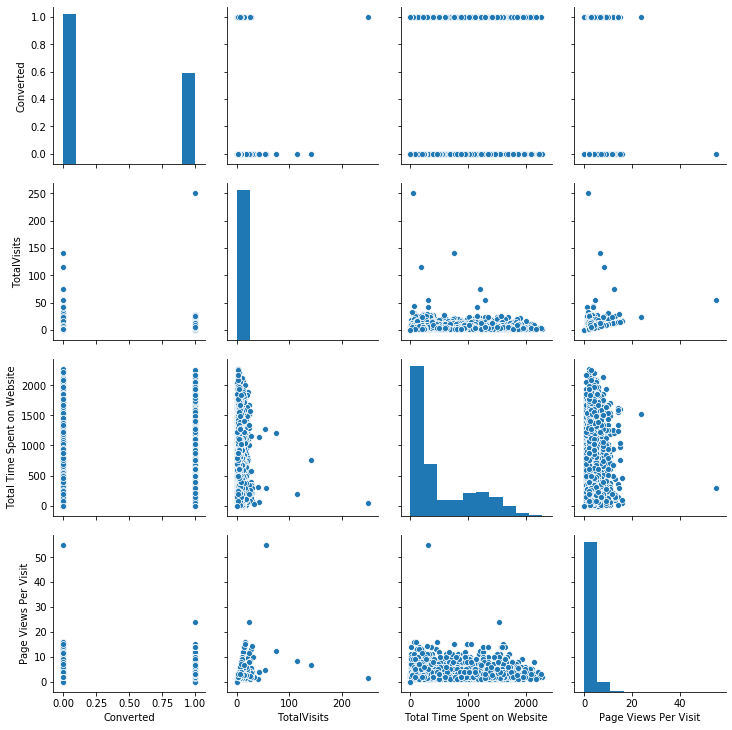

In [53]:
# checking correlation between numeric variables
sns.pairplot(df5)

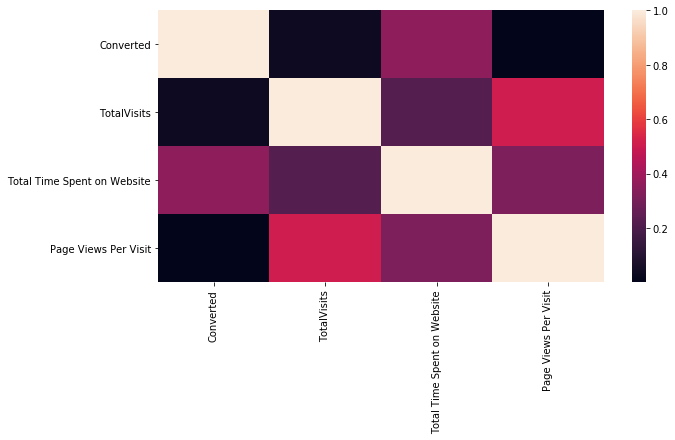

In [54]:
# heatmap between numeric variables
plt.figure(figsize=(10,5))
sns.heatmap(df5.corr())
plt.show()

## 4. Checking Outlier

### 4.1. Outliers Analysis

In [55]:
# analysing percentile of outliers in each column
num = df5[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
round(num.describe(percentiles=[0.15,0.35,0.55,0.75,0.95]),2) 

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.00,9074.00,9074.00
mean,3.46,482.89,2.37
std,4.86,545.26,2.16
min,0.00,0.00,0.00
15%,0.00,0.00,0.00
35%,2.00,96.00,1.50
50%,3.00,246.00,2.00
55%,3.00,301.00,2.00
75%,5.00,922.75,3.20
95%,10.00,1557.00,6.00


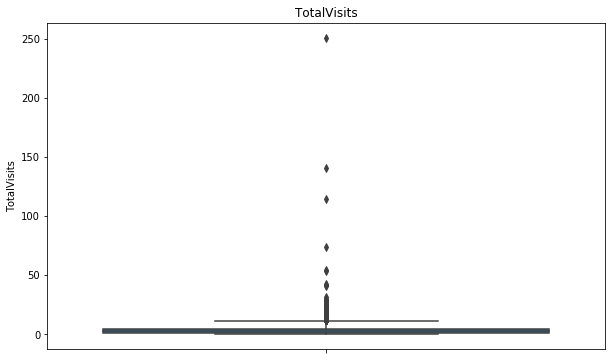

In [56]:
# Visualising the outliers with boxplot for Total Visits
plt.figure(figsize=(10,6))
sns.boxplot(y='TotalVisits', data=df5)
plt.title('TotalVisits')
plt.show()

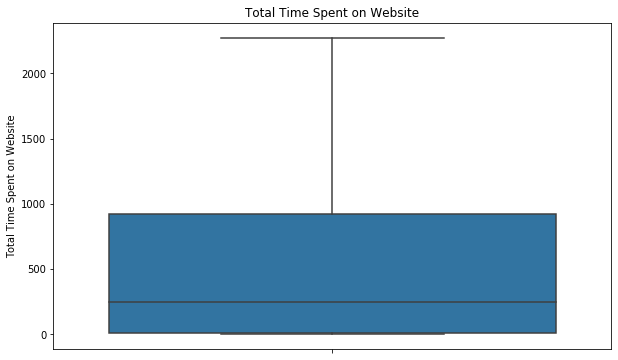

In [57]:
# Visualising the outliers with boxplot for Total Time Spent on Website
plt.figure(figsize=(10,6))
sns.boxplot(y='Total Time Spent on Website', data=df5)
plt.title('Total Time Spent on Website')
plt.show()

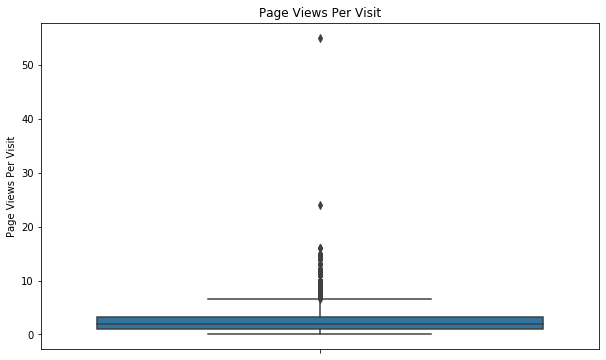

In [58]:

plt.figure(figsize=(10,6))
sns.boxplot(y='Page Views Per Visit', data=df5)
plt.title('Page Views Per Visit')
plt.show()

### 4.2. Outlier Treatment

In [59]:
def treat_outlier(col):

    q1,q3 = col.quantile([0.25,0.75])

    IQR = q3-q1

    lower_range = q1-(1.5*IQR)
     
    upper_range = q3 + (1.5*IQR)
    
    return lower_range, upper_range

In [60]:
def outlier_treated_df(dataframe):
    for i in dataframe.columns:

        if dataframe[i].dtype == 'float64' or dataframe[i].dtype == 'int64':

            lrincome,urincome=treat_outlier(dataframe[i])  # Calling treat_outlier function 
            dataframe[i]=np.where(dataframe[i]>urincome,urincome,dataframe[i])
            dataframe[i]=np.where(dataframe[i]<lrincome,lrincome,dataframe[i])

outlier_treated_df(df5)

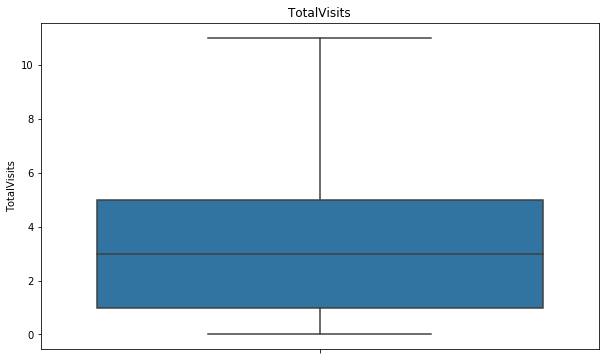

In [61]:
plt.figure(figsize=(10,6))
sns.boxplot(y='TotalVisits', data=df5)
plt.title('TotalVisits')
plt.show()

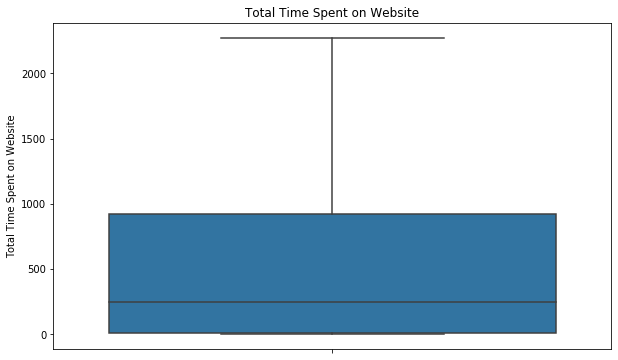

In [62]:
plt.figure(figsize=(10,6))
sns.boxplot(y='Total Time Spent on Website', data=df5)
plt.title('Total Time Spent on Website')
plt.show()

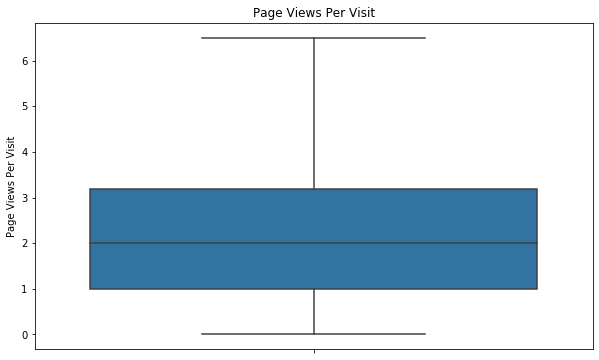

In [63]:
plt.figure(figsize=(10,6))
sns.boxplot(y='Page Views Per Visit', data=df5)
plt.title('Page Views Per Visit')
plt.show()

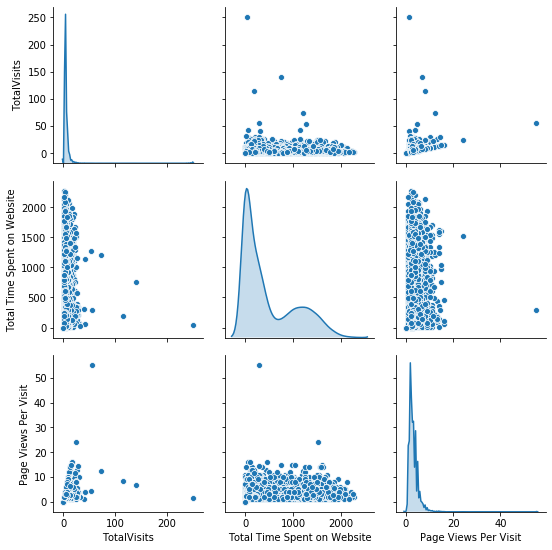

In [64]:
sns.pairplot(num, diag_kind = "kde")
plt.show()

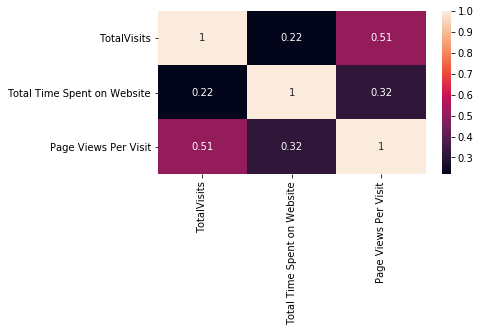

In [65]:
plt.figure(figsize=(6,3))
sns.heatmap(num.corr(),annot=True)
plt.show()

## 5. Dummy Variable

In [66]:
# rechecking dataframe
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   float64
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   float64
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  A free copy of Mastering The Interview  9074 non-null   obje

In [67]:
# checking columns having datatypes as object
df5.loc[:, df5.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [68]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df5[['Lead Origin','Lead Source','Specialization','Do Not Email','Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
df_5_dum = pd.concat([df5, dummy], axis=1)
df_5_dum.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,0.0,0.0,0.0,0.0,page visited on website,not provided,unemployed,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,0.0,5.0,674.0,2.5,email opened,not provided,unemployed,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,1.0,2.0,1532.0,2.0,email opened,business administration,student,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,0.0,1.0,305.0,1.0,unreachable,media and advertising,unemployed,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,1.0,2.0,1428.0,1.0,converted to lead,not provided,unemployed,...,0,0,1,0,0,0,0,0,0,0


In [69]:
# checking columns
df_5_dum.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Lead Origin_landing page submission', 'Lead Origin_lead add form',
       'Lead Origin_lead import', 'Lead Source_blog', 'Lead Source_click2call',
       'Lead Source_direct traffic', 'Lead Source_facebook',
       'Lead Source_google', 'Lead Source_live chat', 'Lead Source_nc_edm',
       'Lead Source_olark chat', 'Lead Source_organic search',
       'Lead Source_pay per click ads', 'Lead Source_press_release',
       'Lead Source_reference', 'Lead Source_referral sites',
       'Lead Source_social media', 'Lead Source_testone',
       'Lead Source_welearn', 'Lead Source_welearnblog_home',
       'Lead Source_welingak website', 'Lead Source_youtubechannel',
       'Specialization_business

### Dropping the repeated variables

In [70]:
# droping variables
df_5_dum = df_5_dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email','Last Activity', 'Specialization', 'Specialization_not provided','What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_5_dum.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.0,5.0,674.0,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,2.0,1532.0,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.0,1.0,305.0,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1.0,2.0,1428.0,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## 5. Train Test Split

In [71]:
# importing libraries SK learn train test modul
from sklearn.model_selection import train_test_split

In [72]:
# Putting feature variable to X
X = df_5_dum.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0.0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674.0,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532.0,2.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305.0,1.0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428.0,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [73]:
# Putting response variable to y
y = df_5_dum['Converted']
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Converted, dtype: float64

In [74]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [75]:
# Importing MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler

In [76]:
# Scaling values
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
3009,0.181818,0.178347,0.307692,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1012,0.181818,0.085355,0.307692,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9226,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0.181818,0.619946,0.307692,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7987,0.454545,0.711590,0.384615,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [77]:
# Checking the lead convertion Rate
lead = (sum(df5['Converted'])/len(df5['Converted'].index))*100
lead

37.85541106458012

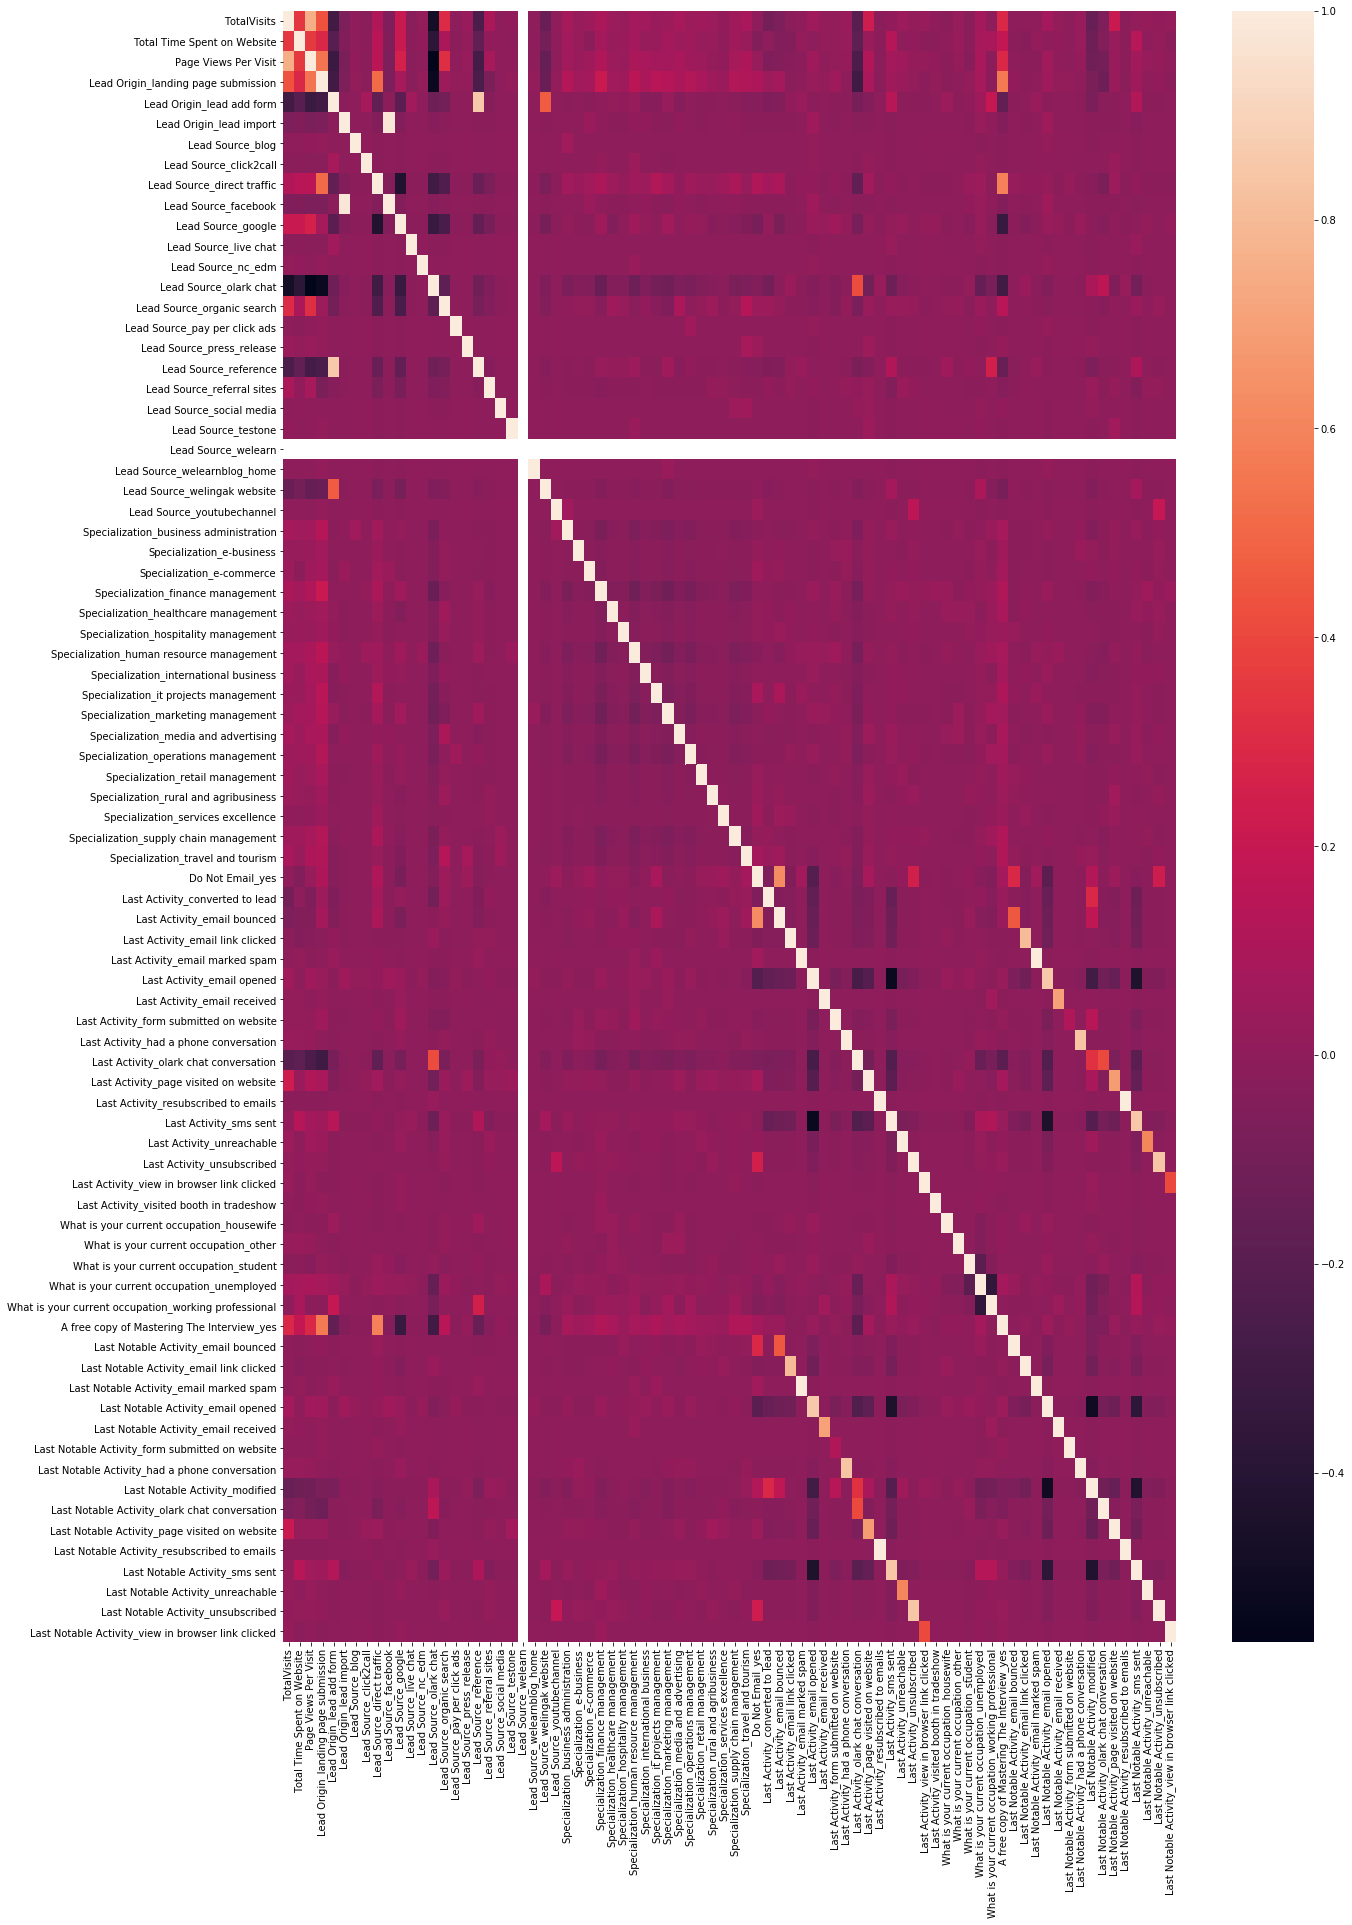

In [78]:
# Checking correlation between variables
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

## 6. Model Building

In [79]:
# importing stats model library
import statsmodels.api as sm

In [80]:
# Assessing the model with StatsModels
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6273
Model Family:                Binomial   Df Model:                           77
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2458.1
Date:                Mon, 11 Jan 2021   Deviance:                       4916.2
Time:                        18:25:34   Pearson chi2:                 6.15e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   20.5349   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
TotalVisits                                              1.2935      0.216      5.975      0.000       0.869       1.718
Total Time Spent on Website                              4.5932      0.173     26.547      0.000       4.254       4.932
Page Views Per Visit                                    -1.0804      0.225     -4.812      0.000      -1.520      -0.640
Lead Origin_landing page submission                     -0.5224      0.132     -3.970      0.000      -0.780      -0.265
Lead Origin_lead add form                               -0.9082      1.554     -0.585      0.559      -3.954       2.137
Lead Origin_lead import                                 24.2622   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_blog                                       -22.4367   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_click2call                                   1.9095      2.484      0.769      0.442      -2.959       6.778
Lead Source_direct traffic                              -0.9593      1.451     -0.661      0.509      -3.804       1.885
Lead Source_facebook                                   -24.1634   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_google                                      -0.6989      1.451     -0.482      0.630      -3.542       2.145
Lead Source_live chat                                   24.1765   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead Source_nc_edm                                      23.3682   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_olark chat                                   0.4139      1.455      0.285      0.776      -2.437       3.265
Lead Source_organic search                              -0.8983      1.453     -0.618      0.536      -3.747       1.950
Lead Source_pay per click ads                          -22.5685   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_press_release                              -21.5292   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_reference                                    3.3711      2.140      1.575      0.115      -0.824       7.566
Lead Source_referral sites                              -1.0271      1.493     -0.688      0.491      -3.954       1.899
Lead Source_social media                                 1.0997      2.114      0.520      0.603      -3.043       5.242
Lead Source_testone                                    -22.7127   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_welearn                                  -3.84

In [81]:
# importing logisctic Regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [82]:
# importing RFE model
from sklearn.feature_selection import RFE

In [83]:
# running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [84]:
rfe.support_

array([False,  True, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True, False, False, False, False,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False])

In [85]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Lead Origin_landing page submission', False, 31),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 44),
 ('Lead Source_blog', False, 51),
 ('Lead Source_click2call', False, 41),
 ('Lead Source_direct traffic', True, 1),
 ('Lead Source_facebook', False, 52),
 ('Lead Source_google', False, 3),
 ('Lead Source_live chat', False, 50),
 ('Lead Source_nc_edm', False, 24),
 ('Lead Source_olark chat', False, 18),
 ('Lead Source_organic search', False, 2),
 ('Lead Source_pay per click ads', False, 49),
 ('Lead Source_press_release', False, 59),
 ('Lead Source_reference', False, 14),
 ('Lead Source_referral sites', True, 1),
 ('Lead Source_social media', False, 23),
 ('Lead Source_testone', False, 45),
 ('Lead Source_welearn', False, 66),
 ('Lead Source_welearnblog_home', False, 55),
 ('Lead Source_welingak website', True, 1),
 ('Lead Source_youtubechannel', F

- Checking Three conditions

- High p-value, high VIF
- High-low:
    - High p, low VIF ==> Remove these first
    - Low p, high VIF ==> Remove these after
- Low p, Low VIF

First remove high p-value cols and recompute VIF. As it is possible VIF decreases with this variable being removed.

In [86]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [87]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [88]:
# Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2664.3
Date:                Mon, 11 Jan 2021   Deviance:                       5328.5
Time:                        18:25:40   Pearson chi2:                 6.08e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7637      0.095    -29.133      0.000      -2.950      -2.578
Total Time Spent on Website                              3.8351      0.145     26.439      0.000       3.551       4.119
Lead Origin_lead add form                                3.0480      0.218     13.964      0.000       2.620       3.476
Lead Source_direct traffic                              -0.5899      0.078     -7.591      0.000      -0.742      -0.438
Lead Source_referral sites                              -0.6470      0.337     -1.919      0.055      -1.308       0.014
Lead Source_welingak website                             1.9623      0.751      2.615      0.009       0.491       3.433
Do Not Email_yes                                        -1.5801      0.170     -9.311      0.000      -1.913      -1.248
Last Activity_had a phone conversation                   2.3842      0.727      3.280      0.001       0.960       3.809
Last Activity_olark chat conversation                   -0.9280      0.162     -5.727      0.000      -1.246      -0.610
Last Activity_sms sent                                   1.2970      0.074     17.647      0.000       1.153       1.441
What is your current occupation_housewife               23.6517   1.61e+04      0.001      0.999   -3.15e+04    3.16e+04
What is your current occupation_other                    1.9948      0.713      2.796      0.005       0.596       3.393
What is your current occupation_student                  1.4372      0.229      6.276      0.000       0.988       1.886
What is your current occupation_unemployed               1.1977      0.087     13.805      0.000       1.028       1.368
What is your current occupation_working professional     3.6304      0.196     18.540      0.000       3.247       4.014
Last Notable Activity_unreachable                        1.9547      0.495      3.952      0.000       0.985       2.924
========================================================================================================================
"""

In [89]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.064792
1012    0.273701
9226    0.433167
4750    0.579574
7987    0.866482
1281    0.806333
2880    0.059703
4971    0.913193
7536    0.777640
1248    0.848169
dtype: float64

In [90]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06479156, 0.27370115, 0.43316687, 0.57957429, 0.86648161,
       0.80633317, 0.05970349, 0.91319295, 0.77764022, 0.84816906])

In [91]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_unemployed,2.08
0,Total Time Spent on Website,1.85
1,Lead Origin_lead add form,1.60
8,Last Activity_sms sent,1.52
2,Lead Source_direct traffic,1.42
4,Lead Source_welingak website,1.33
13,What is your current occupation_working profes...,1.31
5,Do Not Email_yes,1.08
7,Last Activity_olark chat conversation,1.05
11,What is your current occupation_student,1.04


 First remove high p-value cols and recompute VIF. As it is possible VIF decreases with this variable being removed.

In [93]:
# dropping variable with high VIF 
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [94]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2672.2
Date:                Mon, 11 Jan 2021   Deviance:                       5344.4
Time:                        18:25:40   Pearson chi2:                 6.11e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7371      0.094    -29.116      0.000      -2.921      -2.553
Total Time Spent on Website                              3.8373      0.145     26.501      0.000       3.553       4.121
Lead Origin_lead add form                                3.1039      0.219     14.200      0.000       2.675       3.532
Lead Source_direct traffic                              -0.5887      0.078     -7.587      0.000      -0.741      -0.437
Lead Source_referral sites                              -0.6508      0.337     -1.933      0.053      -1.311       0.009
Lead Source_welingak website                             1.9098      0.751      2.544      0.011       0.438       3.381
Do Not Email_yes                                        -1.5846      0.170     -9.336      0.000      -1.917      -1.252
Last Activity_had a phone conversation                   2.3799      0.726      3.276      0.001       0.956       3.804
Last Activity_olark chat conversation                   -0.9363      0.162     -5.783      0.000      -1.254      -0.619
Last Activity_sms sent                                   1.2886      0.073     17.555      0.000       1.145       1.432
What is your current occupation_other                    1.9686      0.713      2.759      0.006       0.570       3.367
What is your current occupation_student                  1.4093      0.229      6.158      0.000       0.961       1.858
What is your current occupation_unemployed               1.1721      0.086     13.628      0.000       1.004       1.341
What is your current occupation_working professional     3.6037      0.195     18.435      0.000       3.221       3.987
Last Notable Activity_unreachable                        1.9412      0.494      3.930      0.000       0.973       2.909
========================================================================================================================
"""

In [95]:
X_train.drop('Lead Source_referral sites', axis = 1, inplace = True)

In [96]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2674.2
Date:                Mon, 11 Jan 2021   Deviance:                       5348.5
Time:                        18:25:40   Pearson chi2:                 6.12e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7493      0.094    -29.310      0.000      -2.933      -2.565
Total Time Spent on Website                              3.8357      0.145     26.497      0.000       3.552       4.119
Lead Origin_lead add form                                3.1143      0.219     14.251      0.000       2.686       3.543
Lead Source_direct traffic                              -0.5780      0.077     -7.468      0.000      -0.730      -0.426
Lead Source_welingak website                             1.9092      0.751      2.543      0.011       0.438       3.381
Do Not Email_yes                                        -1.5819      0.170     -9.325      0.000      -1.914      -1.249
Last Activity_had a phone conversation                   2.3772      0.729      3.262      0.001       0.949       3.806
Last Activity_olark chat conversation                   -0.9436      0.162     -5.821      0.000      -1.261      -0.626
Last Activity_sms sent                                   1.2938      0.073     17.638      0.000       1.150       1.438
What is your current occupation_other                    1.9781      0.713      2.773      0.006       0.580       3.376
What is your current occupation_student                  1.4172      0.229      6.192      0.000       0.969       1.866
What is your current occupation_unemployed               1.1723      0.086     13.642      0.000       1.004       1.341
What is your current occupation_working professional     3.5992      0.195     18.412      0.000       3.216       3.982
Last Notable Activity_unreachable                        1.9155      0.495      3.873      0.000       0.946       2.885
========================================================================================================================
"""

In [97]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.columns.shape[0])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_unemployed,2.07
0,Total Time Spent on Website,1.85
1,Lead Origin_lead add form,1.59
7,Last Activity_sms sent,1.52
2,Lead Source_direct traffic,1.42
3,Lead Source_welingak website,1.33
11,What is your current occupation_working profes...,1.31
4,Do Not Email_yes,1.08
6,Last Activity_olark chat conversation,1.05
9,What is your current occupation_student,1.04


In [98]:
X_train.columns.shape

(13,)

- All The required variable is remove. Now the data is good to go for Evaluation

In [99]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.066403
1012    0.272354
9226    0.429649
4750    0.585234
7987    0.866238
1281    0.804123
2880    0.060515
4971    0.912080
7536    0.777859
1248    0.847895
dtype: float64

In [100]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06640286, 0.27235352, 0.42964867, 0.58523429, 0.86623799,
       0.80412328, 0.06051451, 0.9120805 , 0.77785897, 0.84789502])

In [101]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0.0,0.066403
1,0.0,0.272354
2,0.0,0.429649
3,1.0,0.585234
4,1.0,0.866238


In [102]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0.0,0.066403,0
1,0.0,0.272354,0
2,0.0,0.429649,0
3,1.0,0.585234,1
4,1.0,0.866238,1


## 7. Model Evaluation

In [103]:
# importing metric model
from sklearn import metrics

In [104]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3428,  477],
       [ 796, 1650]], dtype=int64)

In [105]:
# Predicted     not_churn    churn
# Actual
# not_churn        3413      492
# churn             702      1744

In [106]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7995591245473154

In [107]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [108]:
# Calculating the sensitivity
TP/(TP+FN)

0.6745707277187244

In [109]:
# Calculating the specificity
TN/(TN+FP)

0.8778489116517285

## 8. ROC

In [110]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [111]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

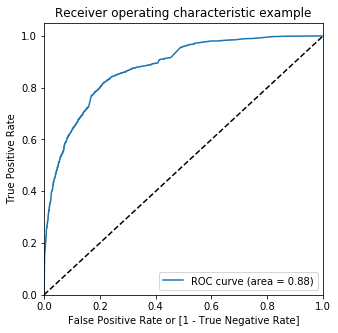

In [112]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
- The curve seems to be good for our model.

### Finding Optimal Cutoff Point

In [113]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.066403,0,1,0,0,0,0,0,0,0,0,0
1,0.0,0.272354,0,1,1,1,0,0,0,0,0,0,0
2,0.0,0.429649,0,1,1,1,1,1,0,0,0,0,0
3,1.0,0.585234,1,1,1,1,1,1,1,0,0,0,0
4,1.0,0.866238,1,1,1,1,1,1,1,1,1,1,0


In [114]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positives 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.609195  0.980785  0.376440
0.2   0.2  0.723980  0.887980  0.621255
0.3   0.3  0.790427  0.842600  0.757746
0.4   0.4  0.804598  0.782093  0.818694
0.5   0.5  0.799559  0.674571  0.877849
0.6   0.6  0.794206  0.588716  0.922919
0.7   0.7  0.778303  0.506132  0.948784
0.8   0.8  0.755629  0.414554  0.969270
0.9   0.9  0.708550  0.257972  0.990781


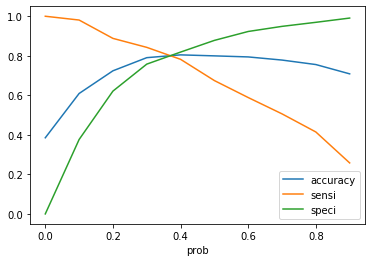

In [115]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From the curve above, 0.34 seems to be the optimum point to take it as a cutoff probability.

In [116]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,0.066403,0,1,0,0,0,0,0,0,0,0,0,0
1,0.0,0.272354,0,1,1,1,0,0,0,0,0,0,0,0
2,0.0,0.429649,0,1,1,1,1,1,0,0,0,0,0,1
3,1.0,0.585234,1,1,1,1,1,1,1,0,0,0,0,1
4,1.0,0.866238,1,1,1,1,1,1,1,1,1,1,0,1


In [117]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7994016690284994

- The Accuracy is 80% which is very good.

In [118]:
# Creating confusion matrix  
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3097,  808],
       [ 466, 1980]], dtype=int64)

In [119]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [120]:
# Let's see the sensitivity of our logistic regression model
TP/(TP+FN)

0.8094848732624693

- Of all the positives 80% were detected

In [121]:
# Let us calculate specificity
TN/(TN+FP)

0.7930857874519847

- Of all the negatives 79% were detected

- Accuracy of 80%
- Sensitivity of 80%
- Specificity of 79%

### All our good values (approx. 80%) and consistent with each other suggests that the model is good.

In [122]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.20691421254801537


In [123]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7101865136298422


In [124]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8692113387594723


In [125]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7101865136298422

In [126]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8094848732624693

- Taking Accuracy, Specificity and Sensitivity as the metrics for the case study. The precision and recall are also in 70s.

- Visualizing Precision and recall tradeoff

In [127]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

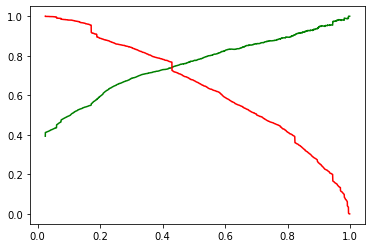

In [128]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Assign Lead Score to Train

In [129]:
y_train_pred_final['Lead Score'] = y_train_pred_final.Conversion_Prob.map(lambda x:round(x*100))
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,0.0,0.066403,0,1,0,0,0,0,0,0,0,0,0,0,7
1,0.0,0.272354,0,1,1,1,0,0,0,0,0,0,0,0,27
2,0.0,0.429649,0,1,1,1,1,1,0,0,0,0,0,1,43
3,1.0,0.585234,1,1,1,1,1,1,1,0,0,0,0,1,59
4,1.0,0.866238,1,1,1,1,1,1,1,1,1,1,0,1,87


In [130]:
y_train_pred_final.sort_values(by = ['Lead Score'], ascending = [False]).head(20)

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
4773,1.0,0.995447,1,1,1,1,1,1,1,1,1,1,1,1,100
5871,1.0,0.998822,1,1,1,1,1,1,1,1,1,1,1,1,100
5043,1.0,0.995260,1,1,1,1,1,1,1,1,1,1,1,1,100
2790,1.0,0.996201,1,1,1,1,1,1,1,1,1,1,1,1,100
3687,1.0,0.996997,1,1,1,1,1,1,1,1,1,1,1,1,100
5971,1.0,0.998732,1,1,1,1,1,1,1,1,1,1,1,1,100
2980,1.0,0.995044,1,1,1,1,1,1,1,1,1,1,1,1,100
4242,1.0,0.996243,1,1,1,1,1,1,1,1,1,1,1,1,100
1543,1.0,0.995878,1,1,1,1,1,1,1,1,1,1,1,1,100
1335,1.0,0.995186,1,1,1,1,1,1,1,1,1,1,1,1,100


## 9. Prediction on Test set

In [131]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [132]:
# Substituting all the columns in the final train model
col = X_train.columns

In [133]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm.head()

,const,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_welingak website,Do Not Email_yes,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_unreachable
3271,1.0,0.070530,0,0,0,0,0,0,0,0,0,0,0,0
1490,1.0,0.679695,0,1,0,0,0,0,0,0,0,0,1,0
7936,1.0,0.033243,0,0,0,0,0,0,0,0,0,0,0,0
4216,1.0,0.000000,1,0,0,0,0,0,0,0,1,0,0,0
3830,1.0,0.073675,0,0,0,0,0,0,0,0,0,0,0,0


In [134]:
#Making predictions on the test set
y_test_pred = res.predict(X_test_sm)

In [135]:
y_test_pred[:10]

3271    0.077357
1490    0.946793
7936    0.067747
4216    0.855965
3830    0.078222
1800    0.727270
6507    0.484754
4821    0.272905
4223    0.944327
4714    0.189146
dtype: float64

In [136]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0.0,0.077357
1,1.0,0.946793
2,0.0,0.067747
3,1.0,0.855965
4,0.0,0.078222


In [137]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [138]:
# Let's see the head
y_pred_1.head()

,0
3271,0.077357
1490,0.946793
7936,0.067747
4216,0.855965
3830,0.078222


In [139]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [140]:
y_test_df['Lead Number'] = y_test_df.index

In [141]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [142]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [143]:
y_pred_final.head()

,Converted,Lead Number,0
0,0.0,3271,0.077357
1,1.0,1490,0.946793
2,0.0,7936,0.067747
3,1.0,4216,0.855965
4,0.0,3830,0.078222


In [144]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [145]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Converted_Prob'], axis=1)

In [146]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,3271,0.0,0.077357
1,1490,1.0,0.946793
2,7936,0.0,0.067747
3,4216,1.0,0.855965
4,3830,0.0,0.078222


In [147]:
y_pred_final['predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.34 else 0)

In [148]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,predicted
0,3271,0.0,0.077357,0
1,1490,1.0,0.946793,1
2,7936,0.0,0.067747,0
3,4216,1.0,0.855965,1
4,3830,0.0,0.078222,0


In [149]:
# Overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted)

0.8049944913698127

In [150]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.predicted )
confusion2

array([[1390,  344],
       [ 187,  802]], dtype=int64)

In [151]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [152]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.8109201213346815

In [153]:
# Specificity
TN / float(TN+FP)

0.8016147635524798

- Accuracy of 81%
- Sensitivity of 80%
- Specificity of 80%

#### All our good values (approx. 80%) and consistent with the trained model. Suggesting the model was well trained

### 9.1. Assigning Lead Score on Test Data

In [154]:
y_pred_final['Lead Score'] = y_pred_final.Converted_Prob.map(lambda x:round(x*100))
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,predicted,Lead Score
0,3271,0.0,0.077357,0,8
1,1490,1.0,0.946793,1,95
2,7936,0.0,0.067747,0,7
3,4216,1.0,0.855965,1,86
4,3830,0.0,0.078222,0,8


In [155]:
y_pred_final.sort_values(by = ['Lead Score'], ascending = [False]).head(20)

,Lead Number,Converted,Converted_Prob,predicted,Lead Score
33,4062,1.0,0.996108,1,100
1617,8521,1.0,0.995339,1,100
1786,2011,1.0,0.995102,1,100
1422,4613,1.0,0.997363,1,100
505,8213,1.0,0.995526,1,100
868,2495,1.0,0.996981,1,100
2491,6944,1.0,0.985614,1,99
2310,3723,1.0,0.994821,1,99
1526,3248,1.0,0.991363,1,99
1055,2674,1.0,0.994821,1,99


A higher lead score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [156]:
# Finding top 3 variables which contribute most towards the probability of a lead getting converted
body = pd.read_html(res.summary().as_html())[1]
body = body[[0,1]]
body.columns = ['Features','Coeff']
body =body.iloc[2:]
body.sort_values(by=['Coeff'],ascending=False)

,Features,Coeff
2,Total Time Spent on Website,3.8357
13,What is your current occupation_working profes...,3.5992
3,Lead Origin_lead add form,3.1143
7,Last Activity_had a phone conversation,2.3772
10,What is your current occupation_other,1.9781
14,Last Notable Activity_unreachable,1.9155
5,Lead Source_welingak website,1.9092
11,What is your current occupation_student,1.4172
9,Last Activity_sms sent,1.2938
12,What is your current occupation_unemployed,1.1723


## 10. Conclusion

From the Analysis above we can come to a conclusion that the following factors are very important for X-Education for Lead conversion:
- Time Spent on Website
- Lead Origin
- Lead Source
- Last Activity
- What is your current Occupation
- Last Notable activity

### And we have also generated the lead score for all the leads we have in the dataset. So our focus should be on those leads where the lead score are high. Where the conversion will be higher.